In [1]:
library(Seurat)
library(WGCNA)
library(igraph)
library(ggplot2)
library(pheatmap)

Attaching SeuratObject

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
as_matrix <- function(mat){
  
  tmp <- matrix(data=0L, nrow = mat@Dim[1], ncol = mat@Dim[2])
  
  row_pos <- mat@i+1
  col_pos <- findInterval(seq(mat@x)-1,mat@p[-1])+1
  val <- mat@x
  
  for (i in seq_along(val)){
    tmp[row_pos[i],col_pos[i]] <- val[i]
  }
  
  row.names(tmp) <- mat@Dimnames[[1]]
  colnames(tmp) <- mat@Dimnames[[2]]
  return(tmp)
}

In [3]:
dataobj<- readRDS('/data1//chenyx//HHCAd//unit_organized_fetal/Left ventricle.rds')

In [4]:
table(dataobj$cell_type)


Cardiomyocyte cell   Endothelial cell    Epithelial cell         Fibroblast 
               392                 99                  1                192 
        Lymphocyte          Mast cell          Myelocyte                 NA 
                20                 12                 55                 24 
Smooth muscle cell 
                 1 

# CM

In [5]:
ct = "Cardiomyocyte cell"

In [6]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [7]:
df <- df[apply(df,1,mad)>0,]

In [8]:
dim(df)

[1] 2368  392

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

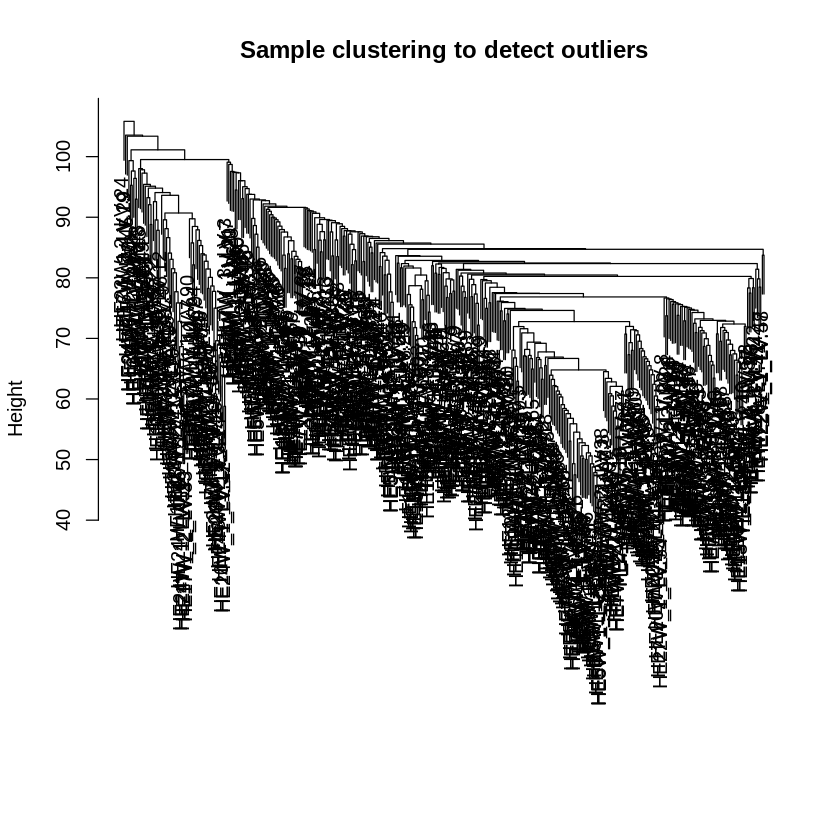

In [9]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [10]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 322 genes from module 1 because their KME is too low.
     ..removing 26 genes from module 2 because their KME is too low.
     ..removing 28 genes from module 3 because their KME is too low.
     ..removing 1 genes from module 5 because their KME is too low.
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
       Calculating new MEs...


TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


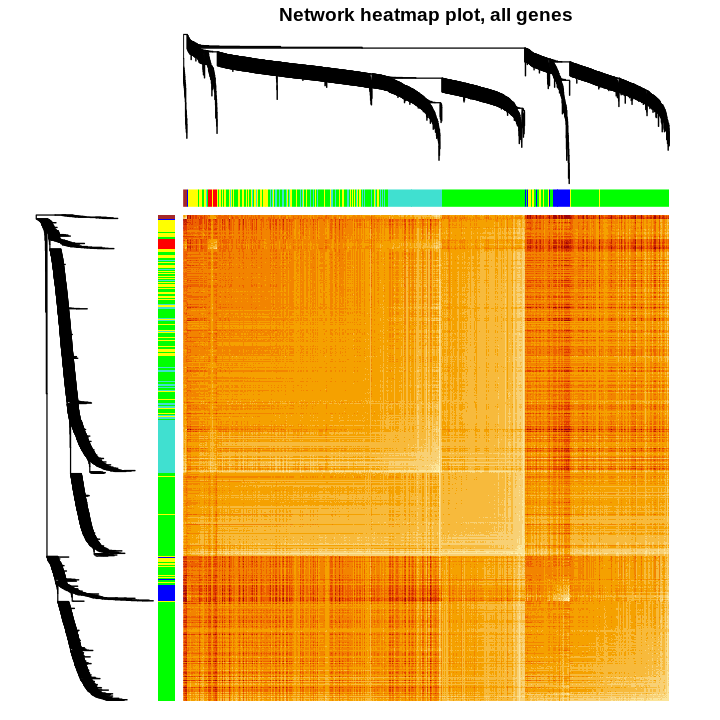

In [11]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

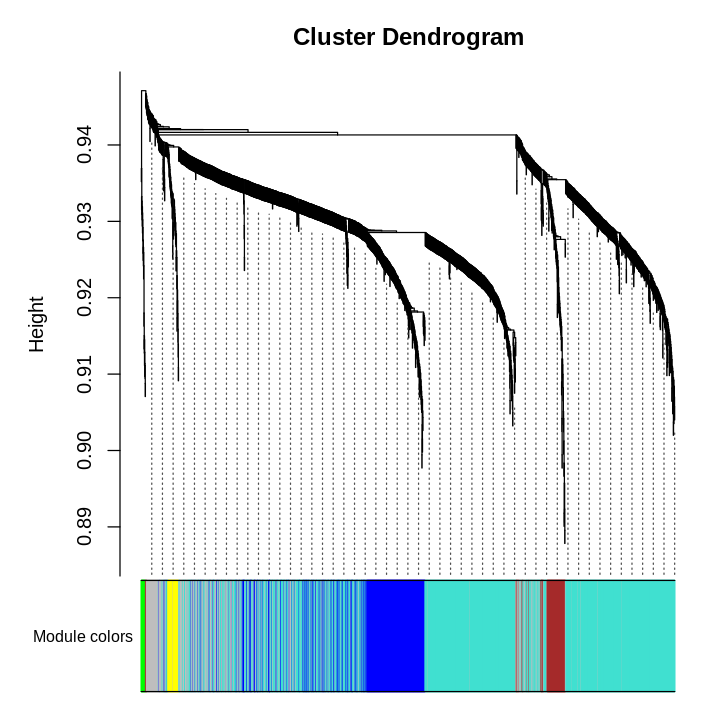

In [12]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [13]:
colors <- table(net$colors)
colors


     blue     brown     green      grey turquoise    yellow 
      416       106        19       377      1404        46 

In [14]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [15]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','LV/',ct,'.',i,'.csv'))
        i = i + 1
    }
}

# Fb

In [16]:
ct = "Fibroblast"

In [17]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [18]:
df <- df[apply(df,1,mad)>0,]

In [19]:
dim(df)

[1] 2722  192

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

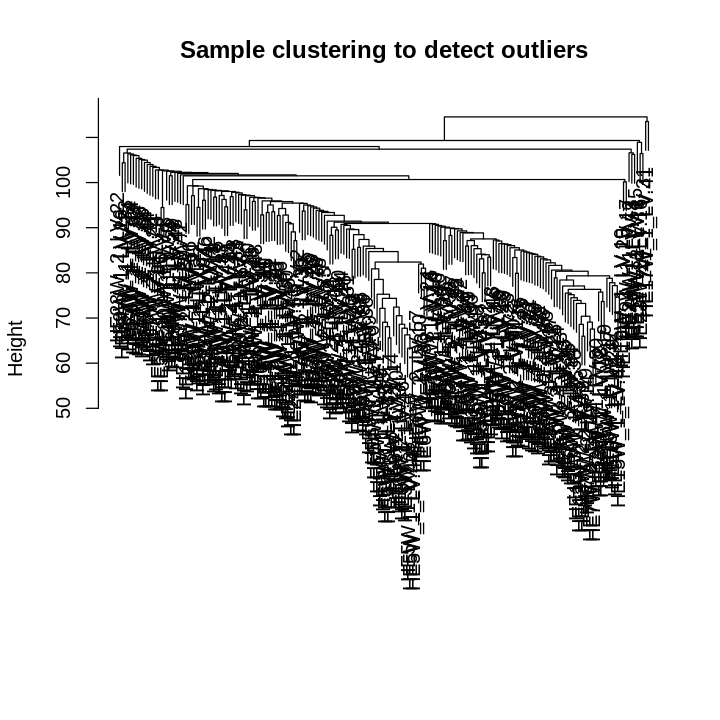

In [20]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [21]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 748 genes from module 1 because their KME is too low.
     ..removing 586 genes from module 2 because their KME is too low.
     ..removing 133 genes from module 3 because their KME is too low.
     ..removing 18 genes from module 4 because their KME is too low.
     ..removing 9 genes from module 5 because their KME is too low.
     ..removing 8 genes from module 6 because their KME is too low.
     ..removing 9 genes from module 7 bec

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


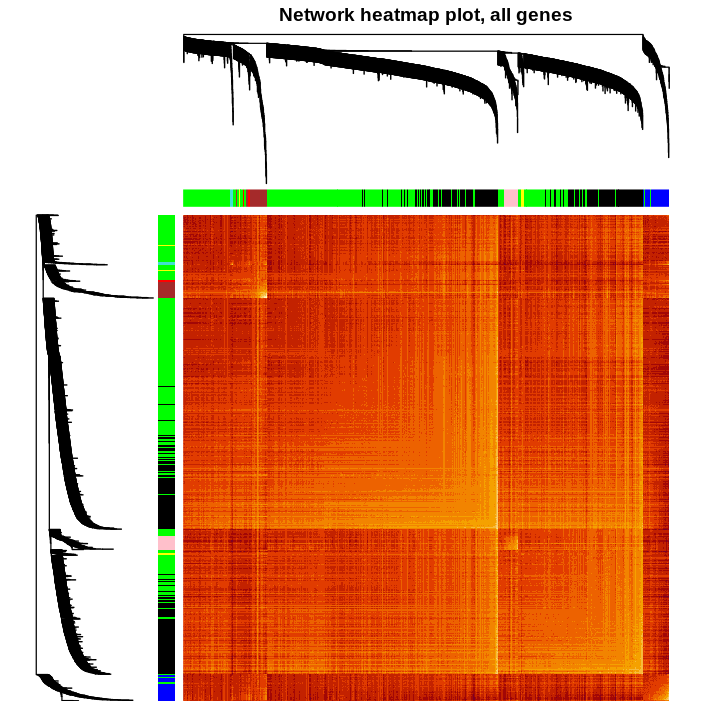

In [22]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

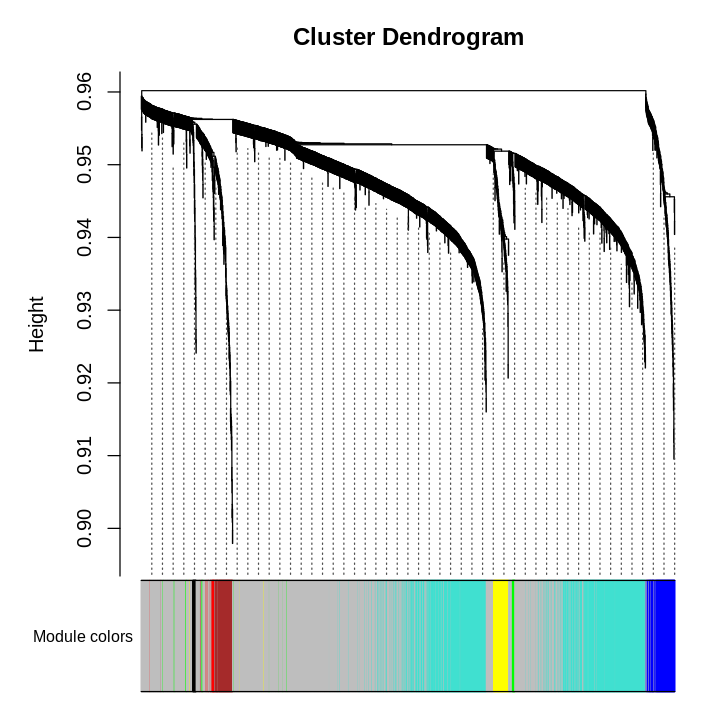

In [23]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [24]:
colors <- table(net$colors)
colors


    black      blue     brown     green      grey       red turquoise    yellow 
       18       131        98        27      1511        18       838        81 

In [25]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [26]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','LV/',ct,'.',i,'.csv'))
        i = i + 1
    }
}

# EC

In [27]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [28]:
df <- df[apply(df,1,mad)>0,]

In [29]:
dim(df)

[1] 2722  192

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

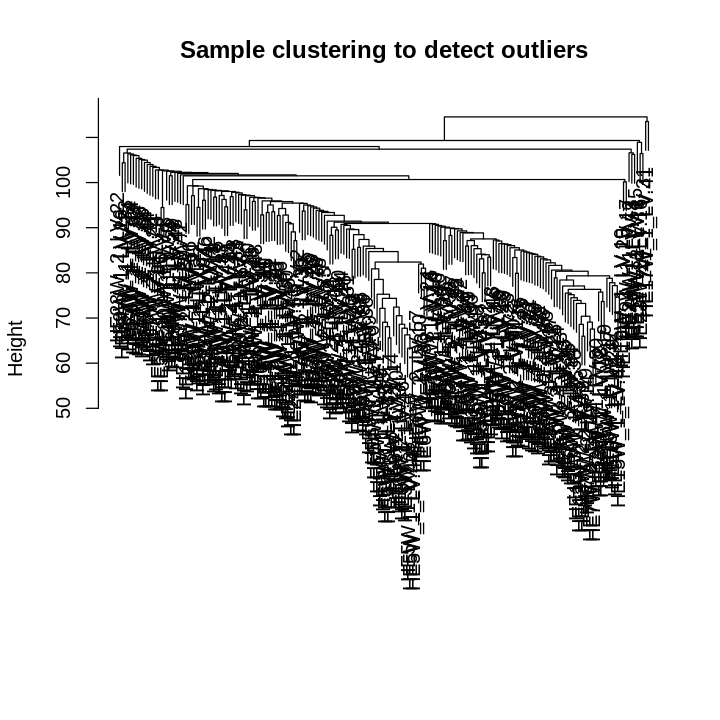

In [30]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [31]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 748 genes from module 1 because their KME is too low.
     ..removing 586 genes from module 2 because their KME is too low.
     ..removing 133 genes from module 3 because their KME is too low.
     ..removing 18 genes from module 4 because their KME is too low.
     ..removing 9 genes from module 5 because their KME is too low.
     ..removing 8 genes from module 6 because their KME is too low.
     ..removing 9 genes from module 7 bec

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


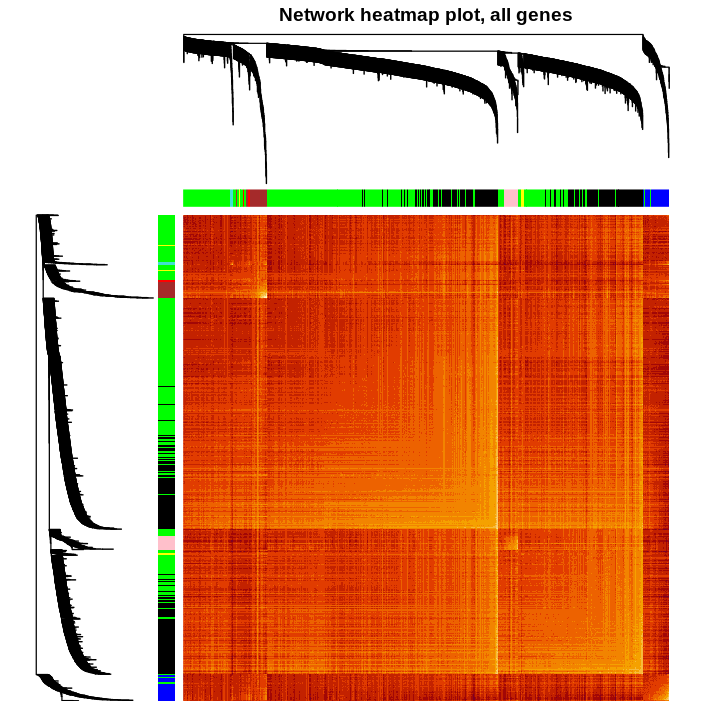

In [32]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

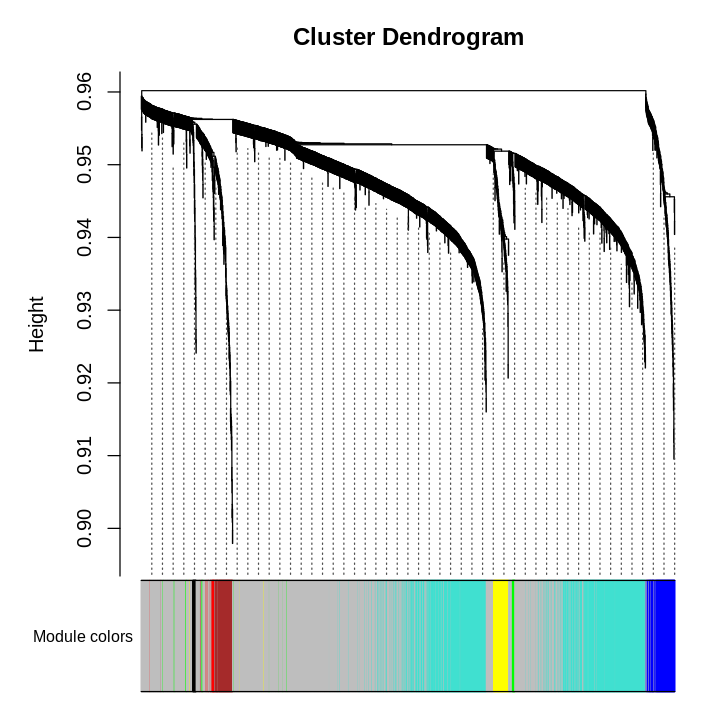

In [33]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [34]:
colors <- table(net$colors)
colors


    black      blue     brown     green      grey       red turquoise    yellow 
       18       131        98        27      1511        18       838        81 

In [35]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [36]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','LV/',ct,'.',i,'.csv'))
        i = i + 1
    }
}

# Myelo

In [37]:
ct = "Myelocyte"

In [38]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [39]:
df <- df[apply(df,1,mad)>0,]

In [40]:
dim(df)

[1] 3078   55

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

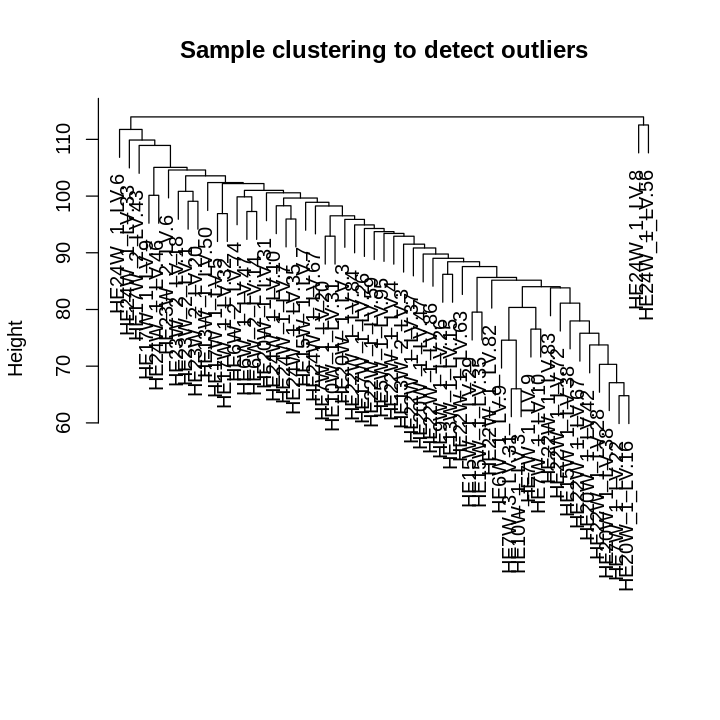

In [41]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [42]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 1299 genes from module 1 because their KME is too low.
     ..removing 115 genes from module 2 because their KME is too low.
     ..removing 26 genes from module 3 because their KME is too low.
     ..removing 29 genes from module 4 because their KME is too low.
     ..removing 6 genes from module 5 because their KME is too low.
     ..removing 3 genes from module 8 because their KME is too low.
     ..removing 2 genes from module 9 bec

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


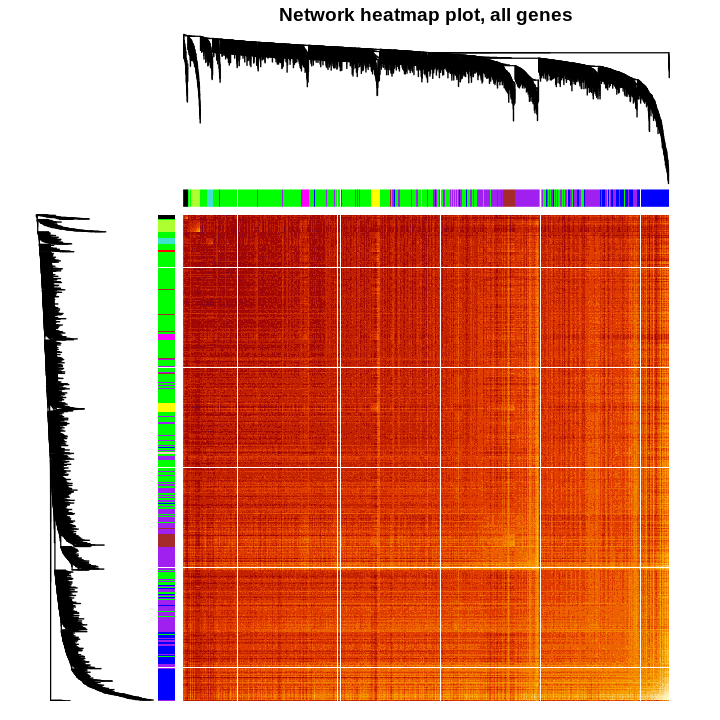

In [43]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

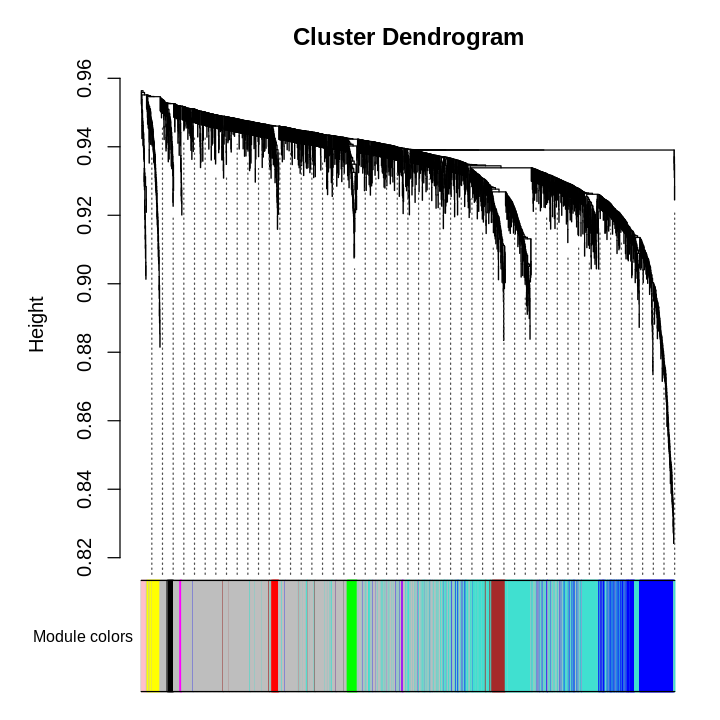

In [44]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [45]:
colors <- table(net$colors)
colors


    black      blue     brown     green      grey   magenta      pink    purple 
       35       402        99        58      1481        11        27        11 
      red turquoise    yellow 
       41       844        69 

In [46]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [47]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','LV/',ct,'.',i,'.csv'))
        i = i + 1
    }
}

# Lympho

In [48]:
ct = "Lymphocyte"

In [49]:
cm.sample <- subset(dataobj,cell_type==ct)
df <- cm.sample@assays$RNA@data[rowSums(cm.sample)>0,]

In [50]:
df <- df[apply(df,1,mad)>0,]

In [51]:
dim(df)

[1] 2181   20

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

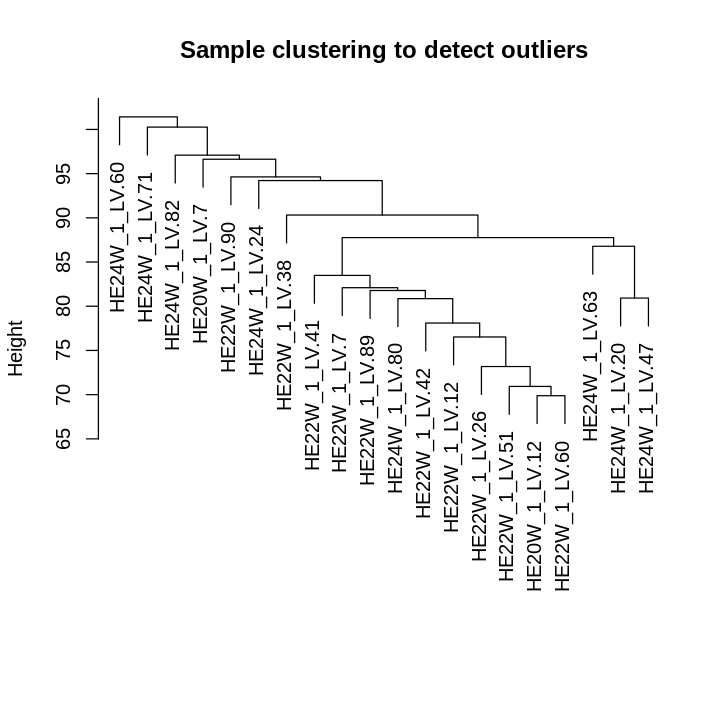

In [52]:
df = as.matrix(df)
datExpr_filted <- t(df)
gsg = goodSamplesGenes(datExpr_filted, verbose = 3)
gsg$allOK
sampleTree = hclust(dist(datExpr_filted), method = "average")
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="")

In [53]:
net <- blockwiseModules(datExpr_filted, power = 5,
  corType = "bicor", # use robust correlation
networkType = "signed", minModuleSize = 10,
reassignThreshold = 0, mergeCutHeight = 0.15, 
numericLabels = F, pamRespectsDendro = FALSE,saveTOMs=T,TOMType='signed',
verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file blockwiseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 86 genes from module 1 because their KME is too low.
     ..removing 34 genes from module 2 because their KME is too low.
     ..removing 8 genes from module 3 because their KME is too low.
     ..removing 10 genes from module 4 because their KME is too low.
     ..removing 12 genes from module 5 because their KME is too low.
     ..removing 11 genes from module 6 because their KME is too low.
     ..removing 2 genes from module 7 becau

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


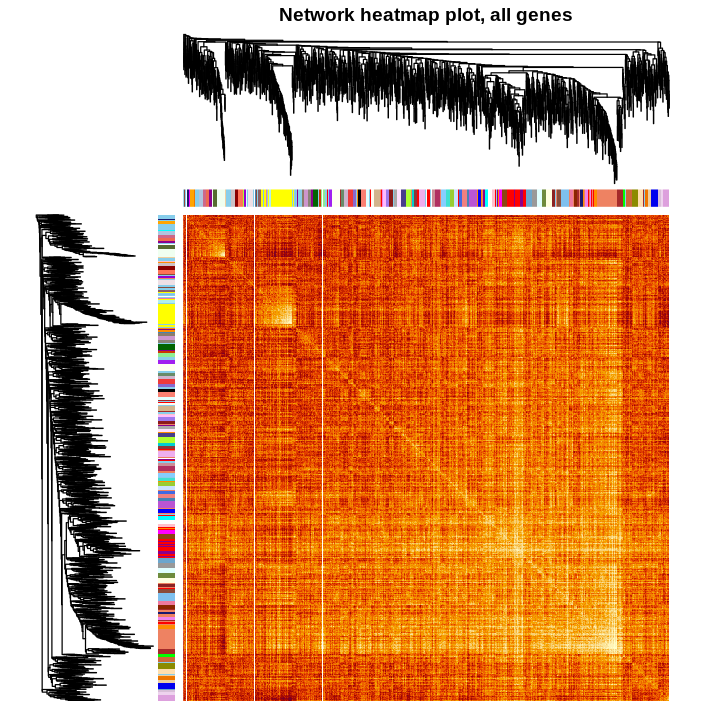

In [54]:
options(repr.plot.width=6, repr.plot.height=6)
geneTree = net$dendrograms[[1]]
moduleColors = labels2colors(net$colors)
TOM <- TOMsimilarityFromExpr(datExpr_filted, power = 5,TOMType = 'signed',corType = "bicor", networkType = "signed")
dissTOM = 1 - TOM
plotTOM = dissTOM ^ 5
diag(plotTOM) = NA
TOMplot(
  plotTOM,
  geneTree,
  moduleColors,
  main = "Network heatmap plot, all genes"
)

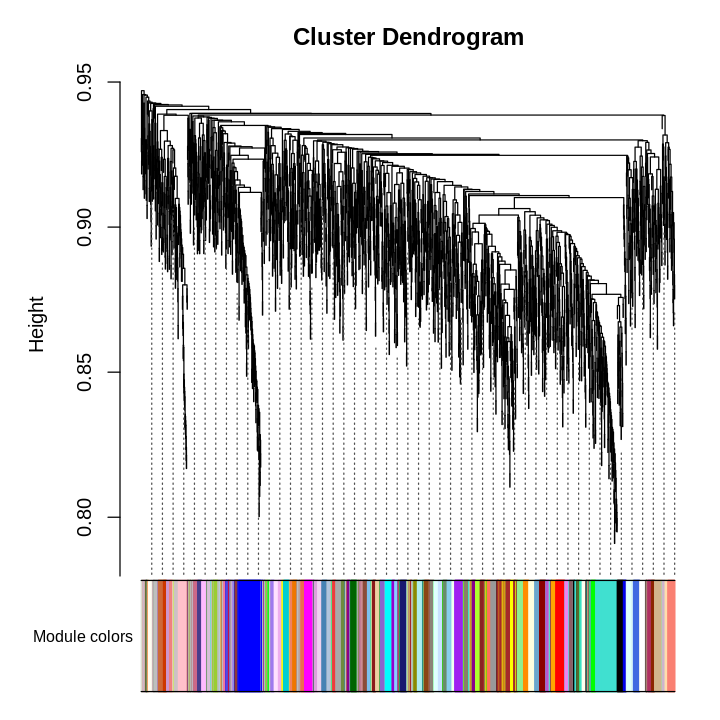

In [55]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [56]:
colors <- table(net$colors)
colors


  antiquewhite4         bisque4           black            blue           blue2 
             15              17              41             113              12 
          brown          brown2          brown4          coral1          coral2 
             99              13              17              15              15 
           cyan       darkgreen        darkgrey     darkmagenta  darkolivegreen 
             27              24              23              20              20 
darkolivegreen4      darkorange     darkorange2         darkred   darkseagreen4 
             13              22              17              25              15 
  darkslateblue   darkturquoise      darkviolet      firebrick4     floralwhite 
             17              24              12              13              17 
          green     greenyellow            grey          grey60       honeydew1 
             42              31             192              26              16 
     indianred4           i

In [57]:
rownames(TOM) <- colnames(datExpr_filted)
colnames(TOM) <- colnames(datExpr_filted)

In [58]:
i = 1
for (c in names(colors)){
    googene <- colnames(datExpr_filted)[net$colors == c]
    TOMp <- TOM[googene,googene]
    df_ct=TOMp
    df_ct <- df_ct -diag(dim(df_ct)[1])
    if(dim(df_ct)[1]>=2){
        write.csv(df_ct,paste0('/data1/chenyx/HHCAd/coexpression/Fetal/','LV/',ct,'.',i,'.csv'))
        i = i + 1
    }
}